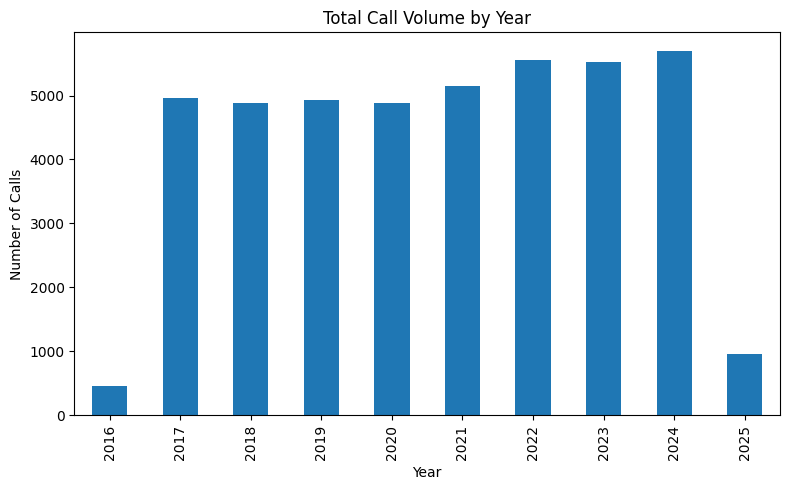

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/clean/calls_by_district_and_time_segment_with_year.csv")


# group by year and count the number of calls
calls_by_year = df.groupby('year').size()

# plot
plt.figure(figsize=(8, 5))
calls_by_year.plot(kind='bar')
plt.title('Total Call Volume by Year')
plt.xlabel('Year')
plt.ylabel('Number of Calls')
plt.tight_layout()
plt.show()

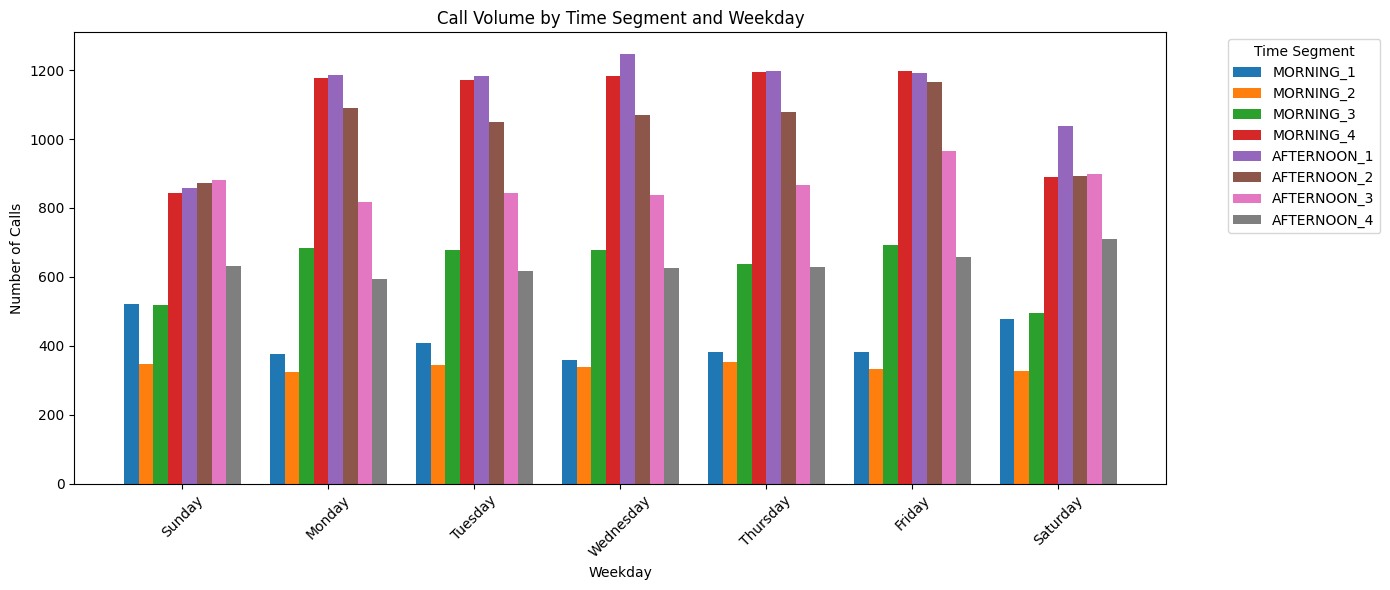

In [3]:
import numpy as np

# define the time segment order (adjust as needed)
time_order = ['MORNING_1', 'MORNING_2', 'MORNING_3', 'MORNING_4',
              'AFTERNOON_1', 'AFTERNOON_2', 'AFTERNOON_3', 'AFTERNOON_4']

# define weekday order
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# group and reindex to fill all combinations
counts = df.groupby(['weekday', 'time_segment']).size().unstack(fill_value=0)
counts = counts.reindex(index=weekday_order, columns=time_order, fill_value=0)

# plot grouped bar chart
x = np.arange(len(weekday_order))  # base x positions for each weekday
width = 0.1  # width of each bar

plt.figure(figsize=(14, 6))

for i, segment in enumerate(time_order):
    plt.bar(x + i * width, counts[segment], width=width, label=segment)

plt.xticks(x + width * 3.5, weekday_order, rotation=45)
plt.xlabel('Weekday')
plt.ylabel('Number of Calls')
plt.title('Call Volume by Time Segment and Weekday')
plt.legend(title='Time Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


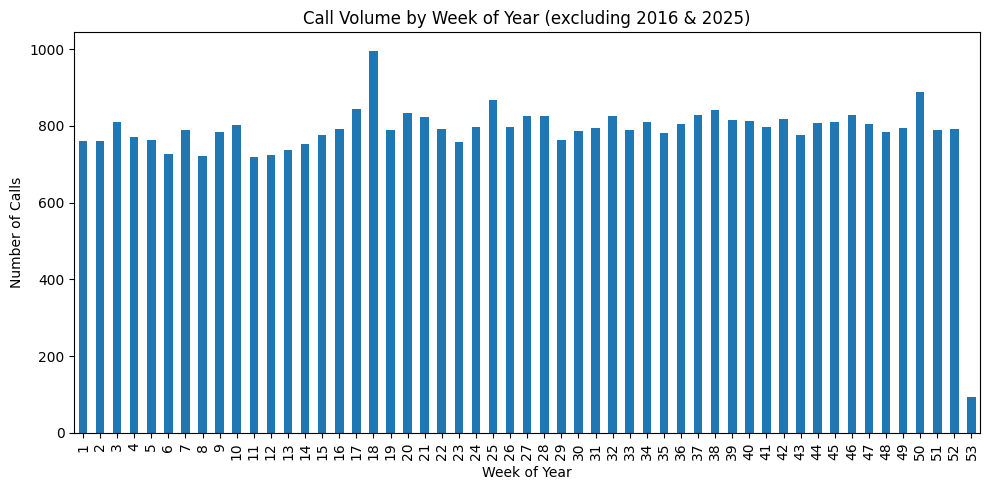

In [5]:
# filter out unwanted years
df_filtered = df[~df['year'].isin([2016, 2025])]

# group by week_of_year
calls_by_week = df_filtered.groupby('week_of_year').size().sort_index()

# plot
plt.figure(figsize=(10, 5))
calls_by_week.plot(kind='bar')
plt.title('Call Volume by Week of Year (excluding 2016 & 2025)')
plt.xlabel('Week of Year')
plt.ylabel('Number of Calls')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()